## Why Convolution ?

* g(x,y) = h(x,y)*f(x,y)

* Convolution can achieve something,  that the previous two methods of manipulating images can’t achieve. Those include the blurring, sharpening, edge detection, noise reduction e.t.c.

### Applications in Image Processing
* Blurring, line and edge detections
* Sobel method, gaussian, laplacian masks are available to achieve this

## Formulae
* Definition of 1D Convolution : y[n]=x[n]*h[n] = summ(x[n].h[n-k])    k-> -inifinite to infinite


#### Learn all deep learning layer apis of tensorflow  

## 1D Convolution

In [1]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [ ]:
x = np.array([6,2])
h = np.array([1,2,5,4])

In [ ]:
y = np.convolve(x,h)

In [ ]:
y

In [ ]:
a = np.array([1,2,3])
b = np.array([5,6,7])
c = np.convolve(a,b)
c

### Apply convolution on  1D array and 2D image  using TensorFlow

### Process
* Convolution ->  relu(activation) --> pooling -> relu(activation)  -> Dropouts -> Probability conversion(softmax)
* Relu Activation function : used to handle non linear data
* Relu is used for Normalization
* Relu fires 0 for all negative values
* pooling-> picks max value from applied patch on array
* backpropogation -> Gradient Descent 

In [ ]:
image_batch = tf.constant([
        [  # First Image
            [[0, 255, 0], [0, 255, 0], [0, 255, 0]],
            [[0, 255, 0], [0, 255, 0], [0, 255, 0]]
        ],
        [  # Second Image
            [[0, 0, 255], [0, 0, 255], [0, 0, 255]],
            [[0, 0, 255], [0, 0, 255], [0, 0, 255]]
        ]
    ])
image_batch.get_shape()

#below dimensions are as -> rows of image 1, rows of image 2 , columns, color

In [ ]:
input_batch = tf.constant([
        [  # First Input
            [[0.0], [1.0]],
            [[2.0], [3.0]]
        ],
        [  # Second Input
            [[2.0], [4.0]],
            [[6.0], [8.0]]
        ]
    ])

kernel = tf.constant([
        [
            [[1.0, 2.0]]
        ]
    ])

In [ ]:
conv2d = tf.nn.conv2d(input_batch, kernel, strides=[1, 1, 1, 1], padding='SAME')

In [ ]:
sess = tf.Session()

In [ ]:
sess.run(conv2d)

In [ ]:
lower_right_image_pixel = sess.run(input_batch)[0][1][1]
lower_right_kernel_pixel = sess.run(conv2d)[0][1][1]
lower_right_image_pixel, lower_right_kernel_pixel

## Strides
The value of convolutions in computer vision is their ability to reduce the dimensionality of the input, which is an image in this case. An image’s dimensionality (2D image) is its width, height and number of channels. A large image dimensionality requires an exponentially larger amount of time for a neural network to scan over every pixel and judge which ones are important. Reducing dimensionality of an image with convolutions is done by altering the strides of the kernel.

The parameter strides, causes a kernel to skip over pixels of an image and not include them in the output. It’s not fair to say the pixels are skipped because they still may affect the output. The strides parameter highlights how a convolution operation is working with a kernel when a larger image and more complex kernel are used. As a convolution is sliding the kernel over the input, it’s using the strides parameter to change how it walks over the input. Instead of going over every element of an input, the strides parameter could configure the convolution to skip certain elements.

For example, take the convolution of a larger image and a larger kernel. In this case, it’s a convolution between a 6 pixel tall, 6 pixel wide and 1 channel deep image (6x6x1) and a (3x3x1) kernel.

In [ ]:
input_batch = tf.constant([
        [  # First Input (6x6x1)
            [[0.0], [1.0], [2.0], [3.0], [4.0], [5.0]],
            [[0.1], [1.1], [2.1], [3.1], [4.1], [5.1]],
            [[0.2], [1.2], [2.2], [3.2], [4.2], [5.2]],
            [[0.3], [1.3], [2.3], [3.3], [4.3], [5.3]],
            [[0.4], [1.4], [2.4], [3.4], [4.4], [5.4]],
            [[0.5], [1.5], [2.5], [3.5], [4.5], [5.5]],
        ],
    ])

kernel = tf.constant([  # Kernel (3x3x1)
        [[[0.0]], [[0.5]], [[0.0]]],
        [[[0.0]], [[1.0]], [[0.0]]],
        [[[0.0]], [[0.5]], [[0.0]]]
    ])

# NOTE: the change in the size of the strides parameter.
conv2d = tf.nn.conv2d(input_batch, kernel, strides=[1, 3, 3, 1], padding='SAME')
sess.run(conv2d)


### Padding
When a kernel is overlapped on an image it should be set to fit within the bounds of the image. At times, the sizing may not fit and a good alternative is to fill the missing area in the image. Filling the missing area of the image is known as padding the image. TensorFlow will pad the image with zeros or raise an error when the sizes don’t allow a kernel to stride over an image without going past its bounds. The amount of zeros or the error state of tf.nn.conv2d is controlled by the parameter padding which has two possible values ('VALID', ‘SAME').

SAME: The convolution output is the SAME size as the input. This doesn’t take the filter’s size into account when calculating how to stride over the image. This may stride over more of the image than what exists in the bounds while padding all the missing values with zero.

VALID: Take the filter’s size into account when calculating how to stride over the image. This will try to keep as much of the kernel inside the image’s bounds as possible. There may be padding in some cases but will avoid.

### Edge Detection example

In [ ]:
kernel = tf.constant([
        [
            [[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]],
            [[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]],
            [[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]]
        ],
        [
            [[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]],
            [[ 8., 0., 0.], [ 0., 8., 0.], [ 0., 0., 8.]],
            [[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]]
        ],
        [
            [[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]],
            [[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]],
            [[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]]
        ]
    ], )

image_batch = tf.cast(image_batch, tf.float32)
conv2d = tf.nn.conv2d(image_batch, kernel, [1, 1, 1, 1], padding="SAME")
activation_map = sess.run(tf.minimum(tf.nn.relu(conv2d), 255))

The output created from convolving an image with an edge detection kernel are all the areas where and edge was detected. The code assumes a batch of images is already available (image_batch) with a real image loaded from disk. In this case, the image is an example image found in the Stanford Dogs Dataset. The kernel has three input and three output channels. The channels sync up to RGB values between left-bracket 0 comma 255 right-bracket with 255 being the maximum intensity. The tf.minimum and tf.nn.relu calls are there to keep the convolution values within the range of valid RGB colors of left-bracket 0 comma 255 right-bracket.


There are many other) common kernels which can be used in this simplified example. Each will highlight different patterns in an image with different results. The following kernel will sharpen an image by increasing the intensity of color changes.

In [ ]:
kernel = tf.constant([
        [
            [[ 0., 0., 0.], [ 0., 0., 0.], [ 0., 0., 0.]],
            [[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]],
            [[ 0., 0., 0.], [ 0., 0., 0.], [ 0., 0., 0.]]
        ],
        [
            [[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]],
            [[ 5., 0., 0.], [ 0., 5., 0.], [ 0., 0., 5.]],
            [[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]]
        ],
        [
            [[ 0., 0., 0.], [ 0., 0., 0.], [ 0., 0., 0.]],
            [[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]],
            [[ 0, 0., 0.], [ 0., 0., 0.], [ 0., 0., 0.]]
        ]
    ])

image_batch = tf.cast(image_batch, tf.float32)
conv2d = tf.nn.conv2d(image_batch, kernel, [1, 1, 1, 1], padding="SAME")
activation_map = sess.run(tf.minimum(tf.nn.relu(conv2d), 255))

In [ ]:
# plt.imshow()
activation_map

### Common Layers
For a neural network architecture to be considered a CNN, it requires at least one convolution layer (tf.nn.conv2d). There are practical uses for a single layer CNN (edge detection), for image recognition and categorization it is common to use different layer types to support a convolution layer. These layers help reduce over-fitting, speed up training and decrease memory usage.

The layers covered in this chapter are focused on layers commonly used in a CNN architecture. A CNN isn’t limited to use only these layers, they can be mixed with layers designed for other network architectures.



### Convolution Layers
One type of convolution layer has been covered in detail (tf.nn.conv2d) but there are a few notes which are useful to advanced users. The convolution layers in TensorFlow don’t do a full convolution, details can be found in the TensorFlow API documentation. In practice, the difference between a convolution and the operation TensorFlow uses is performance. TensorFlow uses a technique to speed up the convolution operation in all the different types of convolution layers.
There are use cases for each type of convolution layer but for tf.nn.conv2d is a good place to start. The other types of convolutions are useful but not required in building a network capable of object recognition and classification. A brief summary of each is included.

TF.NN.DEPTHWISE_CONV2D
This convolution is used when attaching the output of one convolution to the input of another convolution layer. An advanced use case is using a tf.nn.depthwise_conv2d to create a network following the inception architecture.

TF.NN.SEPARABLE_CONV2D
This is similar to tf.nn.conv2d, but not a replacement for it. For large models, it speeds up training without sacrificing accuracy. For small models, it will converge quickly with worse accuracy.

TF.NN.CONV2D_TRANSPOSE
This applies a kernel to a new feature map where each section is filled with the same values as the kernel. As the kernel strides over the new image, any overlapping sections are summed together. There is a great explanation on how tf.nn.conv2d_transpose is used for learnable upsampling in Stanford’s CS231n Winter 2016: Lecture 13.

## Activation Functions
These functions are used in combination with the output of other layers to generate a feature map. They’re used to smooth (or differentiate) the results of certain operations. The goal is to introduce non-linearity into the neural network. Non-linearity means that the input is a curve instead of a straight line. Curves are capable of representing more complex changes in input. For example, non-linear input is capable of describing input which stays small for the majority of the time but periodically has a single point at an extreme. Introduction of non-linearity in a neural network allows it to train on the complex patterns found in data.

TensorFlow has multiple activation functions available. With CNNs, tf.nn.relu is primarily used because of its performance although it sacrifices information. When starting out, using tf.nn.relu is recommended but advanced users may create their own. When considering if an activation function is useful there are a few primary considerations.

1. The function is monotonic, so its output should always be increasing or decreasing along with the input. This allows gradient descent optimization to search for local minima.

2. The function is differentiable, so there must be a derivative at any point in the function’s domain. This allows gradient descent optimization to properly work using the output from this style of activation function.

Any functions that satisfy those considerations could be used as activation functions. In TensorFlow there are a few worth highlighting which are common to see in CNN architectures. A brief summary of each is included with a small sample code illustrating their usage.

### TF.NN.RELU
A rectifier (rectified linear unit) called a ramp function in some documentation and looks like a skateboard ramp when plotted. ReLU is linear and keeps the same input values for any positive numbers while setting all negative numbers to be 0. It has the benefits that it doesn’t suffer from gradient vanishing and has a range of left-bracket 0 comma plus normal infinity right-parenthesis. A drawback of ReLU is that it can suffer from neurons becoming saturated when too high of a learning rate is used.

In [ ]:
features = tf.range(-2, 3)
relu_out = tf.nn.relu(features)
# Keep note of the value for negative features
sess.run([features, relu_out])

### TF.SIGMOID
A sigmoid function returns a value in the range of left-bracket 0.0 comma 1.0 right-bracket. Larger values sent into a tf.sigmoid will trend closer to 1.0 while smaller values will trend towards 0.0. The ability for sigmoids to keep a values between left-bracket 0.0 comma 1.0 right-bracket is useful in networks which train on probabilities which are in the range of  left-bracket 0.0 comma 1.0 right-bracket. The reduced range of output values can cause trouble with input becoming saturated and changes in input becoming exaggerated.

In [ ]:
# Note, tf.sigmoid (tf.nn.sigmoid) is currently limited to float values
features = tf.to_float(tf.range(-1, 3))
sess.run([features, tf.sigmoid(features)])

### TF.TANH

A hyperbolic tangent function (tanh) is a close relative to tf.sigmoid with some of the same benefits and drawbacks. The main difference between tf.sigmoid and tf.tanh is that tf.tanh has a range of left-bracket negative 1.0 comma 1.0 right-bracket. The ability to output negative values may be useful in certain network architectures.

In [ ]:
# Note, tf.tanh (tf.nn.tanh) is currently limited to float values
features = tf.to_float(tf.range(-1, 3))
sess.run([features, tf.tanh(features)])

### TF.NN.DROPOUT
Set the output to be 0.0 based on a configurable probability. This layer performs well in scenarios where a little randomness helps training. An example scenario is when there are patterns being learned that are too tied to their neighboring features. This layer will add a little noise to the output being learned.

NOTE: This layer should only be used during training because the random noise it adds will give misleading results while testing.

In [ ]:
features = tf.constant([-0.1, 0.0, 0.1, 0.2])
# Note, the output should be different on almost ever execution. Your numbers won't match
# this output.
sess.run([features, tf.nn.dropout(features, keep_prob=0.5)])

In this example, the output has a 50% probability of being kept. Each execution of this layer will have different output (most likely, it’s somewhat random). When an output is dropped, its value is set to 0.0.

### Pooling Layers
Pooling layers reduce over-fitting and improving performance by reducing the size of the input. They’re used to scale down input while keeping important information for the next layer. It’s possible to reduce the size of the input using a tf.nn.conv2d alone but these layers execute much faster.

#### TF.NN.MAX_POOL
Strides over a tensor and chooses the maximum value found within a certain kernel size. Useful when the intensity of the input data is relevant to importance in the image.

In [ ]:
# Usually the input would be output from a previous layer and not an image directly.
# Our task is to find largest valus from the array
batch_size=1
input_height = 3
input_width = 3
input_channels = 1

layer_input = tf.constant([
        [
            [[1.0], [0.2], [1.5]],
            [[0.1], [1.2], [1.4]],
            [[1.1], [0.4], [0.4]]
        ]
    ])

# The strides will look at the entire input by using the image_height and image_width
kernel = [batch_size, input_height, input_width, input_channels]
max_pool = tf.nn.max_pool(layer_input, kernel, [1, 1, 1, 1], "VALID")
sess.run(max_pool)

In [ ]:
layer_input.shape

The layer_input is a tensor with a shape similar to the output of tf.nn.conv2d or an activation function. The goal is to keep only one value, the largest value in the tensor. In this case, the largest value of the tensor is 1.5 and is returned in the same format as the input. If the kernel were set to be smaller, it would choose the largest value in each kernel size as it strides over the image.

Max-pooling will commonly be done using 2x2 receptive field (kernel with a height of 2 and width of 2) which is often written as a “2x2 max-pooling operation”. One reason to use a 2x2 receptive field is that it’s the smallest amount of downsampling which can be done in a single pass. If a 1x1 receptive field were used then the output would be the same as the input.

### TF.NN.AVG_POOL
Strides over a tensor and averages all the values at each depth found within a kernel size. Useful when reducing values where the entire kernel is important, for example, input tensors with a large width and height but small depth.

In [ ]:
batch_size=1
input_height = 3
input_width = 3
input_channels = 1

layer_input = tf.constant([
        [
            [[1.0], [1.0], [1.0]],
            [[1.0], [0.5], [0.0]],
            [[0.0], [0.0], [0.0]]
        ]
    ])

# The strides will look at the entire input by using the image_height and image_width
kernel = [batch_size, input_height, input_width, input_channels]
max_pool = tf.nn.avg_pool(layer_input, kernel, [1, 1, 1, 1], "VALID")
sess.run(max_pool)

## Normalization
Normalization layers are not unique to CNNs and aren’t used as often. When using tf.nn.relu, it is useful to consider normalization of the output. Since ReLU is unbounded, it’s often useful to utilize some form of normalization to identify high-frequency features.

### TF.NN.LOCAL_RESPONSE_NORMALIZATION (TF.NN.LRN)
Local response normalization is a function which shapes the output based on a summation operation best explained in TensorFlow’s documentation.

... Within a given vector, each component is divided by the weighted, squared sum of inputs within depth_radius.

One goal of normalization is to keep the input in a range of acceptable numbers. For instance, normalizing input in the range of left-bracket 0.0 comma 1.0 right-bracket where the full range of possible values is normalized to be represented by a number greater than or equal to 0.0 and less than or equal to 1.0. Local response normalization normalizes values while taking into account the significance of each value.

Cuda-Convnet includes further details on why using local response normalization is useful in some CNN architectures. ImageNet uses this layer to normalize the output from tf.nn.relu.

In [ ]:
# Create a range of 3 floats.
# [0,1]
#  TensorShape([batch, image_height, image_width, image_channels])
layer_input = tf.constant([
        [[[ 1.]], [[ 2.]], [[ 3.]]]
    ])

lrn = tf.nn.local_response_normalization(layer_input)
sess.run([layer_input, lrn])

## High Level Layers
TensorFlow has introduced high level layers designed to make it easier to create fairly standard layer definitions. These aren’t required to use but they help avoid duplicate code while following best practices. While getting started, these layers add a number of non-essential nodes to the graph. It’s worth waiting until the basics are comfortable before using these layers.

### TF.CONTRIB.LAYERS.CONVOLUTION2D
The convolution2d layer will do the same logic as tf.nn.conv2d while including weight initialization, bias initialization, trainable variable output, bias addition and adding an activation function. Many of these steps haven’t been covered for CNNs yet but should be familiar. A kernel is a trainable variable (the CNN’s goal is to train this variable), weight initialization is used to fill the kernel with values (tf.truncated_normal) on its first run. The rest of the parameters are similar to what have been used before except they are reduced to short-hand version. Instead of declaring the full kernel, now it’s a simple tuple (1,1) for the kernel’s height and width.

In [ ]:
image_input = tf.constant([
            [
                [[0., 0., 0.], [255., 255., 255.], [254., 0., 0.]],
                [[0., 191., 0.], [3., 108., 233.], [0., 191., 0.]],
                [[254., 0., 0.], [255., 255., 255.], [0., 0., 0.]]
            ]
        ])

conv2d = tf.contrib.layers.convolution2d(
    image_input,
#     num_output_channels=4,     this is deprecated , use below one
    num_outputs=4,
    kernel_size=(1,1),          # It's only the filter height and width.
    activation_fn=tf.nn.relu,
    stride=(1, 1),              # Skips the stride values for image_batch and input_channels.
    trainable=True)

# It's required to initialize the variables used in convolution2d's setup.
# sess.run(tf.initialize_all_variables())   derecated , use below function

sess.run(tf.global_variables_initializer())
sess.run(conv2d)

NOTE: tf.to_float should not be used if the input is an image, instead use tf.image.convert_image_dtype which will properly change the range of values used to describe colors. In this example code, float values of 255. were used which aren’t what TensorFlow expects when is sees an image using float values. TensorFlow expects an image with colors described as floats to stay in the range of left-bracket 0 comma 1 right-bracket.

###  TF.CONTRIB.LAYERS.FULLY_CONNECTED
A fully connected layer is one where every input is connected to every output. This is a fairly common layer in many architectures but for CNNs, the last layer is quite often fully connected. The tf.contrib.layers.fully_connected layer offers a great short-hand to create this last layer while following best practices.

Typical fully connected layers in TensorFlow are often in the format of tf.matmul(features, weight) + bias where feature, weight and bias are all tensors. This short-hand layer will do the same thing while taking care of the intricacies involved in managing the weight and bias tensors.



In [ ]:
features = tf.constant([
        [[1.2], [3.4]]
    ])

fc = tf.contrib.layers.fully_connected(features, num_outputs=2)

# It's required to initialize all the variables first or there'll be an error about precondition failures.
# sess.run(tf.initialize_all_variables())

sess.run(tf.global_variables_initializer())
sess.run(fc)

## Images and TensorFlow
TensorFlow is designed to support working with images as input to neural networks. TensorFlow supports loading common file formats (JPG, PNG), working in different color spaces (RGB, RGBA) and common image manipulation tasks. TensorFlow makes it easier to work with images but it’s still a challenge. The largest challenge working with images are the size of the tensor which is eventually loaded. Every image requires a tensor the same size as the image’s h e i g h t asterisk w i d t h asterisk c h a n n e l s (h.w.c) . As a reminder, channels are represented as a rank 1 tensor including a scalar amount of color in each channel.

In [ ]:
# A red RGB pixel in TensorFlow would be represented with the following tensor.
red = tf.constant([255, 0, 0])


#### Loading images

In [ ]:
# The match_filenames_once will accept a regex but there is no need for this example.
# image_filename = "prithvi.png"
# filename_queue = tf.train.string_input_producer(
#     tf.train.match_filenames_once(image_filename))
filename_queue = tf.train.string_input_producer(['prithvi.jpg']) 
image_reader = tf.WholeFileReader()
_, image_file = image_reader.read(filename_queue)
image = tf.image.decode_jpeg(image_file)



##this method is not working , needs a debug

In [ ]:
sess = tf.Session()

In [ ]:
# sess.run(image)

In [3]:
## Reading multiple images
##Another method

from PIL import Image
filename_queue = tf.train.string_input_producer([r'C:\Users\omc\Desktop\Deep Learning with Tensorflow\prithvi.jpg']) #  list of files to read
reader = tf.WholeFileReader()
key, value = reader.read(filename_queue)
my_img = tf.image.decode_jpeg(value) # use png or jpg decoder based on your files.

init_op = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init_op)

  # Start populating the filename queue.

  coord = tf.train.Coordinator()
  threads = tf.train.start_queue_runners(coord=coord)

  for i in range(1): #length of your filename list
    image = my_img.eval() #here is your image Tensor :)
    #above command is similar to this tf.get_default_session().run(t) 

  print(image.shape)
  Image.fromarray(np.asarray(image)).show()    #displays image

  coord.request_stop()
  coord.join(threads)

(35, 35, 3)


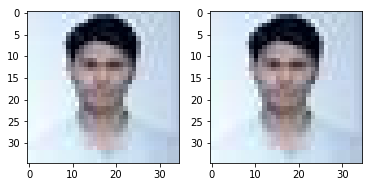

In [4]:
#display image using matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(image)

fig.add_subplot(1,2,2)
plt.imshow(image)
plt.show()

In [ ]:
# with tf.Session() as g:
#     g.run(my_img)

In [ ]:
image.shape

In [ ]:
image
#notice that it’s a fairly simple rank 3 tensor.

#### Tensorflow supports two image file formats Jpeg and Png for decoding
* Jpeg does not have alpha paramenter
* Png has aplha
* Aplha -> Transparency

### TFRECORD
TensorFlow has a built-in file format designed to keep binary data and label (category for training) data in the same file. The format is called TFRecord and the format requires a preprocessing step to convert images to a TFRecord format before training. The largest benefit is keeping each input image in the same file as the label associated with it.

Technically, TFRecord files are protobuf formatted files. They are great for use as a preprocessed format because they aren’t compressed and can be loaded into memory quickly. In this example, an image is written to a new TFRecord formatted file and it’s label is stored as well.

In [ ]:
# Reuse the image from earlier and give it a fake label
image_label = b'\x01'  # Assume the label data is in a one-hot representation (00000001)

# Convert the tensor into bytes, notice that this will load the entire image file
# image_loaded = sess.run(image)
image_loaded = image
image_bytes = image_loaded.tobytes()
image_height, image_width, image_channels = image_loaded.shape

# Export TFRecord
writer = tf.python_io.TFRecordWriter("./output/training-image.tfrecord")

# Don't store the width, height or image channels in this Example file to save space but not required.
example = tf.train.Example(features=tf.train.Features(feature={
            'label': tf.train.Feature(bytes_list=tf.train.BytesList(value=[image_label])),
            'image': tf.train.Feature(bytes_list=tf.train.BytesList(value=[image_bytes]))
        }))

# This will save the example to a text file tfrecord
writer.write(example.SerializeToString())
writer.close()

The label is in a format known as one-hot encoding which is a common way to work with label data for categorization of multi-class data. The Stanford Dogs Dataset is being treated as multi-class data because the dogs are being categorized as a single breed and not a mix of breeds. In the real world, a multilabel solution would work well to predict dog breeds because it’d be capable of matching a dog with multiple breeds.

In the example code, the image is loaded into memory and converted into an array of bytes. The bytes are then added to the tf.train.Example file which are serialized SerializeToString before storing to disk. Serialization is a way of converting the in memory object into a format safe to be transferred to a file. The serialized example is now saved in a format which can be loaded and deserialized back to the example format saved here.

### Loading back our tfrecord image
Now that the image is saved as a TFRecord it can be loaded again but this time from the TFRecord file. This would be the loading required in a training step to load the image and label for training. This will save time from loading the input image and its corresponding label separately

In [ ]:
# Load TFRecord
tf_record_filename_queue = tf.train.string_input_producer(
    tf.train.match_filenames_once("./output/training-image.tfrecord"))

# Notice the different record reader, this one is designed to work with TFRecord files which may
# have more than one example in them.
tf_record_reader = tf.TFRecordReader()
_, tf_record_serialized = tf_record_reader.read(tf_record_filename_queue)

# The label and image are stored as bytes but could be stored as int64 or float64 values in a
# serialized tf.Example protobuf.
tf_record_features = tf.parse_single_example(
    tf_record_serialized,
    features={
        'label': tf.FixedLenFeature([], tf.string),
        'image': tf.FixedLenFeature([], tf.string),
    })

# Using tf.uint8 because all of the channel information is between 0-255
tf_record_image = tf.decode_raw(
    tf_record_features['image'], tf.uint8)

# Reshape the image to look like the image saved, not required
tf_record_image = tf.reshape(
    tf_record_image,
    [image_height, image_width, image_channels])
# Use real values for the height, width and channels of the image because it's required
# to reshape the input.

tf_record_label = tf.cast(tf_record_features['label'], tf.string)

At first, the file is loaded in the same way as any other file. The main difference is that the file is then read using a TFRecordReader. Instead of decoding the image, the TFRecord is parsed tf.parse_single_example and then the image is read as raw bytes (tf.decode_raw).

After the file is loaded, it is reshaped (tf.reshape) in order to keep it in the same layout as tf.nn.conv2d expects it [image_height, image_width, image_channels]. It’d be save to expand the dimensions (tf.expand) in order to add in the batch_size dimension to the input_batch.

In [5]:
sess = tf.Session()

In [ ]:
#The following code is useful to check that the image saved to disk is the same as the image which was loaded from TensorFlow.
# sess.run(tf.equal(image, tf_record_image))


### output:
    array([[[ True, True, True],
    [ True, True, True],
    [ True, True, True]],
    [[ True, True, True],
    [ True, True, True],
    [ True, True, True]],
    [[ True, True, True],
    [ True, True, True],
    [ True, True, True]]], dtype=bool)

In [ ]:
 # Check that the label is still 0b00000001.
# sess.run(tf_record_label)

### Image Manipulation
CNNs work well when they’re given a large amount of diverse quality training data. Images capture complex scenes in a way which visually communicates an intended subject. In the Stanford Dog’s Dataset, it’s important that the images visually highlight the importance of dogs in the picture. A picture with a dog clearly visible in the center is considered more valuable than one with a dog in the background.

TensorFlow is not designed as an image manipulation framework. There are libraries available in Python which support more image manipulation than TensorFlow (PIL and OpenCV). For TensorFlow, we’ll summarize a few useful image manipulation features available which are useful in training CNNs.

### CROPPING
Cropping an image will remove certain regions of the image without keeping any information. Cropping is similar to tf.slice where a section of a tensor is cut out from the full tensor. Cropping an input image for a CNN can be useful if there is extra input along a dimension which isn’t required. For example, cropping dog pictures where the dog is in the center of the images to reduce the size of the input.

In [6]:
cropped_image =  tf.image.central_crop(image, 0.1)
sess.run(cropped_image)
#this will crop 10% of input image , this will operate by center

array([[[140, 114, 113]]], dtype=uint8)

In [8]:
cropped_image =  tf.image.central_crop(image, 0.5)
sess.run(cropped_image)

array([[[208, 217, 232],
        [ 18,  25,  41],
        [  0,   0,  12],
        ..., 
        [  0,   2,  16],
        [ 99, 108, 123],
        [223, 235, 251]],

       [[222, 231, 246],
        [ 62,  68,  82],
        [  1,   3,  15],
        ..., 
        [  0,   0,  12],
        [116, 123, 139],
        [217, 229, 245]],

       [[234, 242, 255],
        [102, 106, 118],
        [  3,   1,  12],
        ..., 
        [  6,   8,  21],
        [150, 156, 170],
        [216, 225, 242]],

       ..., 
       [[228, 248, 255],
        [219, 242, 250],
        [214, 234, 243],
        ..., 
        [202, 221, 228],
        [202, 222, 233],
        [203, 225, 238]],

       [[219, 241, 252],
        [205, 229, 239],
        [208, 231, 239],
        ..., 
        [192, 210, 220],
        [191, 213, 226],
        [194, 217, 231]],

       [[219, 241, 254],
        [199, 223, 233],
        [207, 229, 240],
        ..., 
        [187, 207, 218],
        [186, 208, 222],
        [187, 210,

In [ ]:
# fig = plt.figure()
# fig.add_subplot(1,2,1)


In [10]:
# This crop method only works on real value input.
real_image = image

bounding_crop = tf.image.crop_to_bounding_box(
    real_image, offset_height=0, offset_width=0, target_height=2, target_width=1)

sess.run(bounding_crop)

array([[[222, 232, 244]],

       [[224, 234, 246]]], dtype=uint8)

### PADDING
Pad an image with zeros in order to make it the same size as an expected image. This can be accomplished using tf.pad but TensorFlow has another function useful for resizing images which are too large or too small. The method will pad an image which is too small including zeros along the edges of the image. Often, this method is used to resize small images because any other method of resizing with distort the image.

In [18]:
# This padding method only works on real value input.
# real_image = sess.run(image)
real_image = bounding_crop
pad = tf.image.pad_to_bounding_box(
    real_image, offset_height=0, offset_width=0, target_height=2, target_width=3)

sess.run(pad)

array([[[222, 232, 244],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[224, 234, 246],
        [  0,   0,   0],
        [  0,   0,   0]]], dtype=uint8)

This example code increases the images height by one pixel and its width by a pixel as well. The new pixels are all set to 0. Padding in this manner is useful for scaling up an image which is too small. This can happen if there are images in the training set with a mix of aspect ratios. TensorFlow has a useful shortcut for resizing images which don’t match the same aspect ratio using a combination of pad and crop.

In [21]:
# This padding method only works on real value input.
# real_image = sess.run(image)
real_image = image
crop_or_pad = tf.image.resize_image_with_crop_or_pad(
    real_image, target_height=3, target_width=5)

sess.run(crop_or_pad)

array([[[159, 128, 143],
        [151, 121, 121],
        [147, 121, 120],
        [138, 116, 118],
        [173, 157, 160]],

       [[162, 134, 148],
        [130, 100,  98],
        [140, 114, 113],
        [151, 130, 129],
        [152, 136, 137]],

       [[141, 113, 127],
        [159, 131, 128],
        [148, 122, 121],
        [147, 126, 125],
        [123, 107, 108]]], dtype=uint8)

### FLIPPING
Flipping an image is exactly what it sounds like. Each pixel’s location is reversed horizontally or vertically. Technically speaking, flopping is the term used when flipping an image vertically. Terms aside, flipping images is useful with TensorFlow to give different perspectives of the same image for training. For example, a picture of an Australian Shepherd with crooked left ear could be flipped in order to allow matching of crooked right ears.

TensorFlow has functions to flip images vertically, horizontally and choose randomly. The ability to randomly flip an image is a useful method to keep from overfitting a model to flipped versions of images.

In [24]:
top_left_pixels = tf.slice(image, [0, 0, 0], [2, 2, 3])

flip_horizon = tf.image.flip_left_right(top_left_pixels)
flip_vertical = tf.image.flip_up_down(flip_horizon)

sess.run([top_left_pixels])

[array([[[222, 232, 244],
         [222, 232, 244]],
 
        [[224, 234, 246],
         [224, 234, 246]]], dtype=uint8)]

In [26]:
sess.run(flip_vertical)

array([[[224, 234, 246],
        [224, 234, 246]],

       [[222, 232, 244],
        [222, 232, 244]]], dtype=uint8)

In [29]:
sess.run(flip_horizon)

array([[[222, 232, 244],
        [222, 232, 244]],

       [[224, 234, 246],
        [224, 234, 246]]], dtype=uint8)

In [33]:
top_left_pixels = tf.slice(image, [0, 0, 0], [2, 2, 3])

random_flip_horizon = tf.image.random_flip_left_right(top_left_pixels)
random_flip_vertical = tf.image.random_flip_up_down(random_flip_horizon)

sess.run(random_flip_vertical)

array([[[224, 234, 246],
        [224, 234, 246]],

       [[222, 232, 244],
        [222, 232, 244]]], dtype=uint8)

### SATURATION AND BALANCE
Images which are found on the internet are often edited in advance. For instance, many of the images found in the Stanford Dogs dataset have too much saturation (lots of color). When an edited image is used for training, it may mislead a CNN model into finding patterns which are related to the edited image and not the content in the image.

TensorFlow has useful functions which help in training on images by changing the saturation, hue, contrast and brightness. The functions allow for simple manipulation of these image attributes as well as randomly altering these attributes. The random altering is useful in training in for the same reason randomly flipping an image is useful. The random attribute changes help a CNN be able to accurately match a feature in images which have been edited or were taken under different lighting.

In [36]:
example_red_pixel = tf.constant([254., 2., 15.])
adjust_brightness = tf.image.adjust_brightness(example_red_pixel, 0.2)    #0.2 -> alpha

sess.run(adjust_brightness)

array([ 254.19999695,    2.20000005,   15.19999981], dtype=float32)

This example brightens a single pixel, which is primarily red, with a delta of 0.2. Unfortunately, in the current version of TensorFlow 0.9, this method doesn’t work well with a tf.uint8 input. It’s best to avoid using this when possible and preprocess brightness changes.

In [39]:
adjust_contrast = tf.image.adjust_contrast(image, -.5)

sess.run(tf.slice(adjust_contrast, [1, 0, 0], [1, 3, 3]))

array([[[156, 164, 176],
        [156, 164, 176],
        [157, 164, 176]]], dtype=uint8)

The example code adjusts the hue found in the image to make it more colorful. The adjustment accepts a delta parameter which controls the amount of hue to adjust in the image.

In [42]:
adjust_saturation = tf.image.adjust_saturation(image, 0.4)

sess.run(tf.slice(adjust_saturation, [1, 0, 0], [1, 3, 3]))

array([[[237, 241, 246],
        [237, 241, 246],
        [237, 241, 247]]], dtype=uint8)

### Colors
CNNs are commonly trained using images with a single color. When an image has a single color it is said to use a grayscale colorspace meaning it uses a single channel of colors. For most computer vision related tasks, using grayscale is reasonable because the shape of an image can be seen without all the colors. The reduction in colors equates to a quicker to train image. Instead of a 3 component rank 1 tensor to describe each color found with RGB, a grayscale image requires a single component rank 1 tensor to describe the amount of gray found in the image.

Although grayscale has benefits, it’s important to consider applications which require a distinction based on color. Color in images is challenging to work with in most computer vision because it isn’t easy to mathematically define the similarity of two RGB colors. In order to use colors in CNN training, it’s useful to convert the colorspace the image is natively in.

### GRAYSCALE
Grayscale has a single component to it and has the same range of color as RGB left-bracket 0 comma 255 right-bracket.

In [45]:
gray = tf.image.rgb_to_grayscale(image)

sess.run(tf.slice(gray, [0, 0, 0], [1, 3, 1]))

array([[[230],
        [230],
        [229]]], dtype=uint8)

In [47]:
gray_image = tf.image.rgb_to_grayscale(image)

In [50]:

type(image)

numpy.ndarray

In [67]:
grayscale_image = sess.run(gray_image)

In [68]:

grayscale_image.shape

(35, 35, 1)

In [69]:
np.asarray(grayscale_image).ndim 

3

In [72]:
np.asarray(grayscale_image).shape[2]

1

### HSV
Hue, saturation and value are what make up HSV colorspace. This space is represented with a 3 component rank 1 tensor similar to RGB. HSV is not similar to RGB in what it measures, it’s measuring attributes of an image which are closer to human perception of color than RGB. It is sometimes called HSB, where the B stands for brightness.

In [76]:
hsv = tf.image.rgb_to_hsv(tf.image.convert_image_dtype(image, tf.float32))

sess.run(tf.slice(hsv, [0, 0, 0], [3, 3, 3]))

array([[[ 0.59090912,  0.09016392,  0.95686281],
        [ 0.59090912,  0.09016392,  0.95686281],
        [ 0.58974361,  0.10612243,  0.96078438]],

       [[ 0.59090912,  0.08943088,  0.96470594],
        [ 0.59090912,  0.08943088,  0.96470594],
        [ 0.58974361,  0.10526314,  0.96862751]],

       [[ 0.59090912,  0.08870967,  0.97254908],
        [ 0.59090912,  0.08870967,  0.97254908],
        [ 0.58974361,  0.10441766,  0.97647065]]], dtype=float32)

### RGB
RGB is the colorspace which has been used in all the example code so far. It’s broken up into a 3 component rank 1 tensor which includes the amount of red left-bracket 0 comma 255 right-bracket, green left-bracket 0 comma 255 right-bracket and blue left-bracket 0 comma 255 right-bracket. Most images are already in RGB but TensorFlow has builtin functions in case the images are in another colorspace.

In [78]:
rgb_hsv = tf.image.hsv_to_rgb(hsv)
rgb_grayscale = tf.image.grayscale_to_rgb(gray)

### CASTING IMAGES
In these examples, tf.to_float is often used in order to illustrate changing an image’s type to another format. For examples, this works OK but TensorFlow has a built in function to properly scale values as they change types. tf.image.convert_image_dtype(image, dtype, saturate=False) is a useful shortcut to change the type of an image from tf.uint8 to tf.float.